___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Bruno Morales Balkins

#### Daniel do Carmo Granja de Castro

#### Omar Dibo Calixto Afrange Neto
___

# Qual a chance de um estudante entrar em uma faculdade baseado em diversos parametros relacionados a notas em exames e qualidade da faculdade.

___

## A. INTRODUÇÃO

Nossa base de dados contem informações sobre alguns candidatos de universidades variadas. As variáveis incluem notas em alguns testes, experiência com pesquisa, carta de recomendação e outros quesitos necessários, além disso ela traz a probabilidade dele ser aceito na universidade desejada. O intuito deste projeto é prever a probabilidade do aluno conseguir passar na universidade a partir de modelos de regressão e comparar com o valor real de probabilidade.

___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [6]:
print('Esperamos trabalhar no diretório')
print("documents/github/projeto3dpdados/")

Esperamos trabalhar no diretório
documents/github/projeto3dpdados/


### BASE DE DADOS

In [7]:
dados = pd.read_csv('Admission_Predict.csv')
dados

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Serial No.: Número de série do aluno

GRE Scores: Nota do aluno no teste GRE

TOEFL Scores: Nota do aluno no teste TOEFL

University Rating: Classificação do nível de ensino da universidade desejada

Statment of purpose (SOP): Qualidade do texto sobre o objeto de pesquisa do aluno

Letter of recomendation (LOR): Qualidade da carta de recomendação do aluno

Undergraduate Grade Point Average (CGPA): Média acadêmica do aluno

Research: Experiência com pesquisa. 1- Sim, 2- Não

Change of Admission: Probabilidade de admissão do aluno

In [8]:
dados = dados.drop("Serial No.",axis=1)

### ANÁLISE DESCRITIVA

**Variáveis Quantitativas**

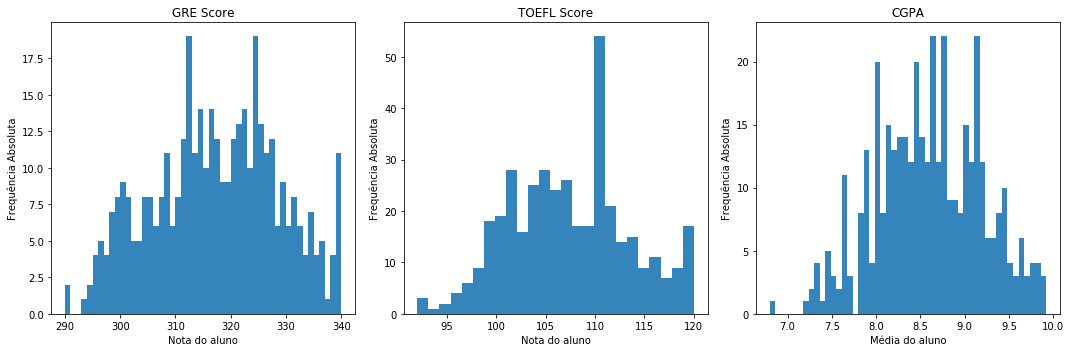

In [9]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = dados["GRE Score"].plot.hist(bins=50,title='GRE Score', alpha=0.9)
plt.ylabel('Frequência Absoluta')
plt.xlabel('Nota do aluno')

plt.subplot(132)
plot = dados["TOEFL Score"].plot.hist(bins=25,title='TOEFL Score', alpha=0.9)
plt.ylabel('Frequência Absoluta')
plt.xlabel('Nota do aluno')

plt.subplot(133)
plot = dados["CGPA"].plot.hist(bins=50,title='CGPA', alpha=0.9)
plt.ylabel('Frequência Absoluta')
plt.xlabel('Média do aluno')

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Nota do aluno')

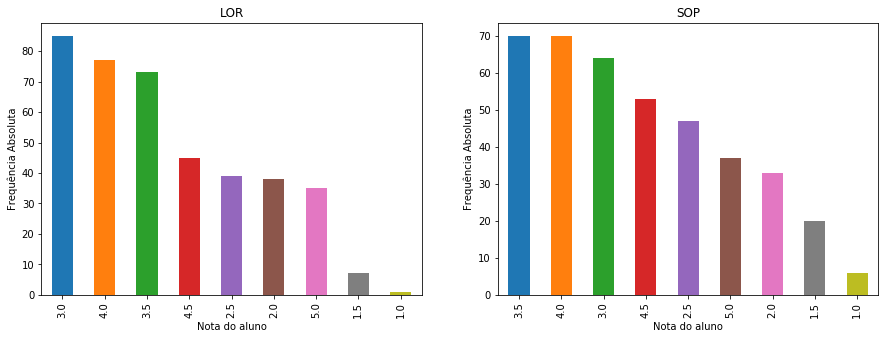

In [10]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(121)
adQuantitativa2 = dados["LOR "].value_counts()
plot = adQuantitativa2.plot(kind='bar', legend=False,title="LOR");
plt.ylabel('Frequência Absoluta')
plt.xlabel('Nota do aluno')

plt.subplot(122)
adQuantitativa3 = dados["SOP"].value_counts()
plot = adQuantitativa3.plot(kind='bar', legend=False,title="SOP");
plt.ylabel('Frequência Absoluta')
plt.xlabel('Nota do aluno')

**Variável Qualitativa**

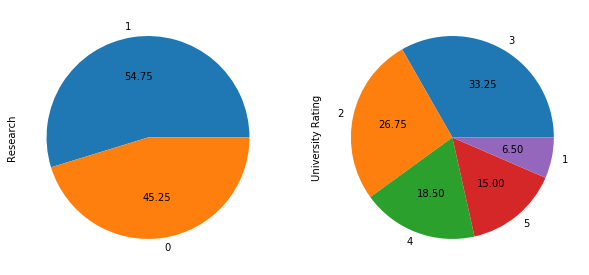

In [11]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
adQualitativa = dados['Research'].value_counts()
adQualitativa.plot(kind='pie', autopct="%0.2f",legend=False);

plt.subplot(122)
adQuantitativa = dados['University Rating'].value_counts()
adQuantitativa.plot(kind='pie', autopct="%0.2f",legend=False);

In [12]:
dados

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


Após a análise univariada vamos estudar como elas se correlacionam. Utilzaremos uma matriz de cores para entender a influência de cada uma delas.

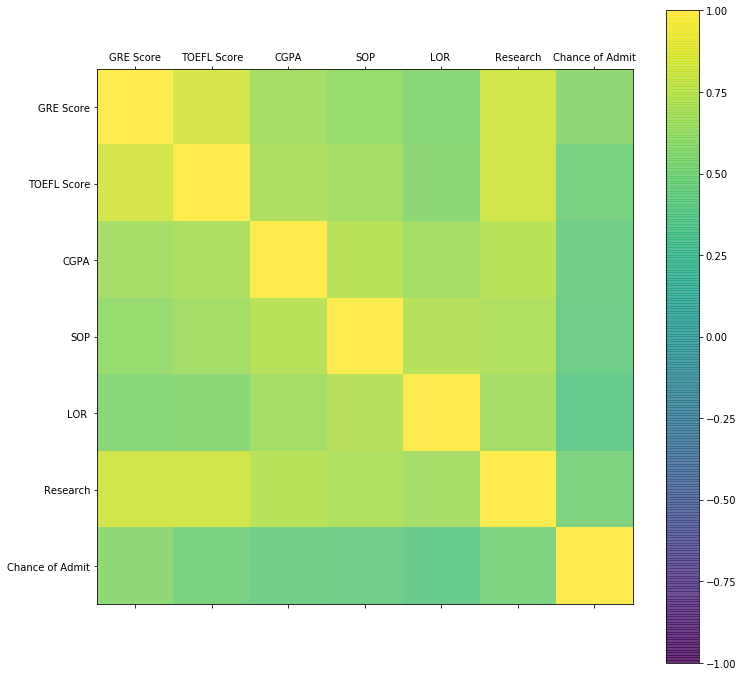

In [13]:
correl = dados.iloc[:,:7].corr()
correl
names = ['GRE Score','TOEFL Score','CGPA','SOP','LOR ','Research','Chance of Admit']
d = len(names)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correl, interpolation='none', vmin=-1, vmax=1 ,alpha=0.8)
fig.colorbar(cax)
ticks = np.arange(0,d,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()

___
## C. MODELOS DE PREDIÇÃO

In [14]:
trainingSet, testSet = train_test_split(dados, test_size = 0.25)
testSet.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
50,313,98,3,2.5,4.5,8.30,1,0.76
130,339,114,5,4.0,4.5,9.76,1,0.96
27,298,98,2,1.5,2.5,7.50,1,0.44
306,323,110,3,4.0,3.5,9.10,1,0.79
93,301,97,2,3.0,3.0,7.88,1,0.44


o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

In [15]:
admissao = trainingSet['Chance of Admit ']
mu = admissao.mean()

admissao2 = testSet['Chance of Admit ']
mu2 = admissao2.mean()


In [16]:
mu


0.7267666666666663

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

In [17]:
X=dados[['CGPA','TOEFL Score','GRE Score','University Rating','SOP','LOR ']]
y=dados['Chance of Admit ']
X_treinamento,X_teste,y_treinamento,y_teste = train_test_split(X,y,test_size=.3,random_state=0)

<function matplotlib.pyplot.show(*args, **kw)>

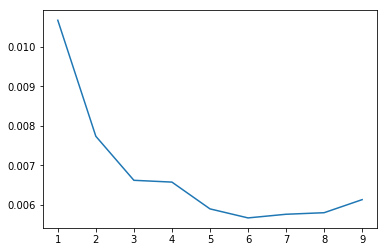

In [18]:
lista_valorK=np.arange(1,10,1)
lista_resultadoK=[]
for e in lista_valorK:
    clf=KNeighborsRegressor(e)
    clf.fit(X_treinamento,y_treinamento)
    y_pred=clf.predict(X_teste)
    lista_resultadoK.append(mean_squared_error(y_teste,y_pred))
    
plt.plot(lista_valorK, lista_resultadoK)    
plt.show

In [19]:
clf=KNeighborsRegressor(7)
clf.fit(X_treinamento,y_treinamento)
y_pred=clf.predict(X_treinamento)
print(mean_squared_error(y_treinamento,y_pred))

0.004527237609329446


In [20]:
y_pred_teste=clf.predict(X_teste)
print(mean_squared_error(y_teste,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [120, 280]

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

In [ ]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [ ]:
df = trainingSet[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ','CGPA','Chance of Admit ']]

In [ ]:
Y = df['Chance of Admit ']

In [ ]:
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ','CGPA']]

In [ ]:
results = regress(X,Y)
results.summary()

In [ ]:
valor_previsao = -1.4346 + testSet['GRE Score']*0.0026 + testSet['TOEFL Score']*0.0022 + testSet['University Rating']*0.0077 - testSet['SOP']*0.0003 + testSet['LOR ']*0.022 + testSet['CGPA']*0.1166

In [ ]:
valor_previsao

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

Media

In [ ]:
adm = (admissao - mu)**2
   
adm2 = (admissao2 - mu)**2

In [ ]:
x = adm.mean()
y = adm2.mean()

In [ ]:
rmstreino = x**0.5
rmsteste = y**0.5

In [ ]:
rmstreino, rmsteste


REGRESSAO LINEAR

In [ ]:
admregressao = (admissao2-valor_previsao)**2

In [ ]:
x2 = admregressao.mean()

In [ ]:
rmsteste2 = x2

___
## E. CONCLUSÃO

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS